#    # Analysis of winequality_white.csv. 

# Problem Introduction & Motivation

Problem Introduction : The goal here is to predict which white wines will be judged to be “high quality” BEFORE the judging takes place.

Motivation : I never tasted wine before. May be this data set will help me in choosing a good wine when I buy it in future.


In [1]:
import numpy as np 
import pandas as pd 

# Data Preparation

#Importing the data set 

In [2]:
df=pd.read_csv('/Users/vijaykumardevalla/Documents/ML in Business/winequality-white.csv')

In [3]:
df

,high_quality,chlorides,total_sulfur_dioxide,density,pH,alcohol
0,0,0.045,170.0,1.00100,3.00,8.8
1,0,0.049,132.0,0.99400,3.30,9.5
2,0,0.050,97.0,0.99510,3.26,10.1
3,0,0.058,186.0,0.99560,3.19,9.9
4,0,0.058,186.0,0.99560,3.19,9.9
...,...,...,...,...,...,...
4893,0,0.039,92.0,0.99114,3.27,11.2
4894,0,0.047,168.0,0.99490,3.15,9.6
4895,0,0.041,111.0,0.99254,2.99,9.4
4896,1,0.022,110.0,0.98869,3.34,12.8


In [4]:
#remove missing or NaN (Not-a-Number) values from the DataFrame.
df_model_specified = df.dropna()

In [5]:
df_model_specified

,high_quality,chlorides,total_sulfur_dioxide,density,pH,alcohol
0,0,0.045,170.0,1.00100,3.00,8.8
1,0,0.049,132.0,0.99400,3.30,9.5
2,0,0.050,97.0,0.99510,3.26,10.1
3,0,0.058,186.0,0.99560,3.19,9.9
4,0,0.058,186.0,0.99560,3.19,9.9
...,...,...,...,...,...,...
4893,0,0.039,92.0,0.99114,3.27,11.2
4894,0,0.047,168.0,0.99490,3.15,9.6
4895,0,0.041,111.0,0.99254,2.99,9.4
4896,1,0.022,110.0,0.98869,3.34,12.8


In [6]:
features = ['chlorides','total_sulfur_dioxide','density','pH','alcohol']
features

['chlorides', 'total_sulfur_dioxide', 'density', 'pH', 'alcohol']

In [7]:
df_model = df[features + ['high_quality']].dropna()

In [8]:
df_model.to_csv('/Users/vijaykumardevalla/Documents/ML in Business/df_model.csv', index=False)

In [9]:
df_model

,chlorides,total_sulfur_dioxide,density,pH,alcohol,high_quality
0,0.045,170.0,1.00100,3.00,8.8,0
1,0.049,132.0,0.99400,3.30,9.5,0
2,0.050,97.0,0.99510,3.26,10.1,0
3,0.058,186.0,0.99560,3.19,9.9,0
4,0.058,186.0,0.99560,3.19,9.9,0
...,...,...,...,...,...,...
4893,0.039,92.0,0.99114,3.27,11.2,0
4894,0.047,168.0,0.99490,3.15,9.6,0
4895,0.041,111.0,0.99254,2.99,9.4,0
4896,0.022,110.0,0.98869,3.34,12.8,1


In [10]:
# Separate features and target variable
X_specified = df_model[features]
X_specified.head()

,chlorides,total_sulfur_dioxide,density,pH,alcohol
0,0.045,170.0,1.0010,3.00,8.8
1,0.049,132.0,0.9940,3.30,9.5
2,0.050,97.0,0.9951,3.26,10.1
3,0.058,186.0,0.9956,3.19,9.9
4,0.058,186.0,0.9956,3.19,9.9


Our Target variable in this case is high_quality which has values 0,1. Rest 5 columns chlorides,total_sulfur_dioxide, density, pH, alcohol are going to be our independent variables using which we will be understanding how the quality of the wine is altered with these parameters.

In [11]:
y_specified = df_model['high_quality']
y_specified.head()

0    0
1    0
2    0
3    0
4    0
Name: high_quality, dtype: int64

In [12]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

# Split the data into training and test sets
X_train_specified, X_test_specified, y_train_specified, y_test_specified = train_test_split(
    X_specified, y_specified, test_size=0.2, random_state=42
)

# Print the shapes of the training and test sets
print(X_train_specified.shape)
print(X_test_specified.shape)

(3918, 5)
(980, 5)


# Creating the classification model

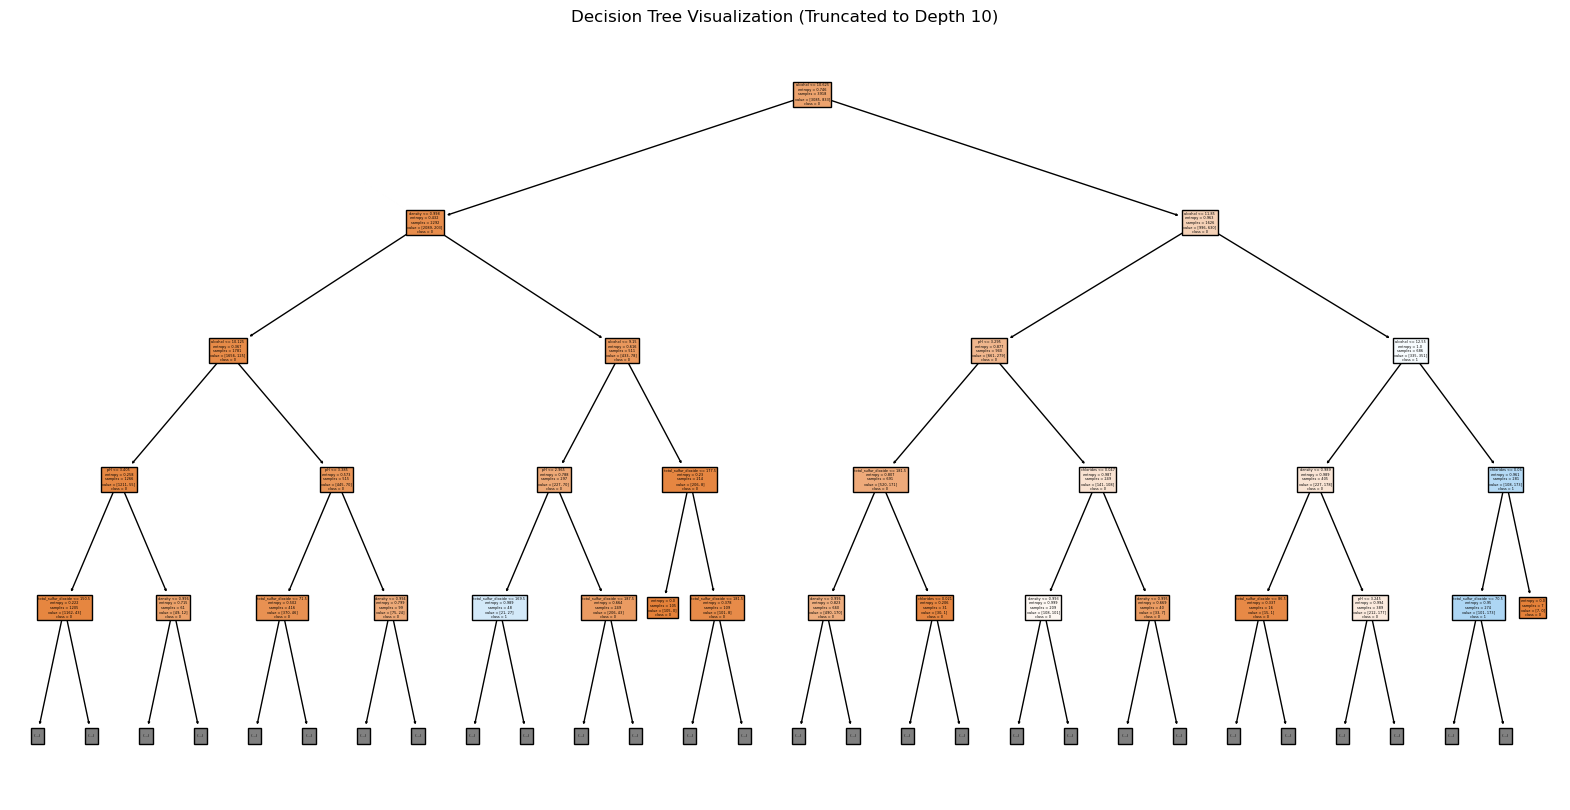

In [13]:
# Initialize and train the Decision Tree Classifier with entropy criterion
tree_clf_specified = DecisionTreeClassifier(criterion='entropy', random_state=42)
tree_clf_specified.fit(X_train_specified, y_train_specified)

# Visualize the result
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Limit the depth of the tree to make it more interpretable
plt.figure(figsize=(20, 10))
plot_tree(tree_clf_specified, max_depth=4, filled=True, feature_names=features, class_names=['0', '1'])
plt.title('Decision Tree Visualization (Truncated to Depth 10)')
plt.show()


In [14]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

text_representation = tree.export_text(tree_clf_specified, feature_names=features, max_depth=4)
print(text_representation)

|--- alcohol <= 10.62
|   |--- density <= 1.00
|   |   |--- alcohol <= 10.12
|   |   |   |--- pH <= 3.41
|   |   |   |   |--- total_sulfur_dioxide <= 150.50
|   |   |   |   |   |--- truncated branch of depth 15
|   |   |   |   |--- total_sulfur_dioxide >  150.50
|   |   |   |   |   |--- truncated branch of depth 10
|   |   |   |--- pH >  3.41
|   |   |   |   |--- density <= 1.00
|   |   |   |   |   |--- truncated branch of depth 9
|   |   |   |   |--- density >  1.00
|   |   |   |   |   |--- class: 0
|   |   |--- alcohol >  10.12
|   |   |   |--- pH <= 3.39
|   |   |   |   |--- total_sulfur_dioxide <= 71.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- total_sulfur_dioxide >  71.50
|   |   |   |   |   |--- truncated branch of depth 15
|   |   |   |--- pH >  3.39
|   |   |   |   |--- density <= 0.99
|   |   |   |   |   |--- truncated branch of depth 11
|   |   |   |   |--- density >  0.99
|   |   |   |   |   |--- truncated branch of depth 7
|   |--- density >  1.00
|   |   |---

The decision tree starts with a root node, which is the top-level decision point for the entire tree.
Each level of the tree corresponds to a decision based on a feature and a threshold value. 
The tree splits the data into different branches based on these decisions.
The representation shows that the tree considers various features such as "alcohol," "density," "pH," "total_sulfur_dioxide," and "chlorides" for making decisions.

"Class: 0" or "class: 1" at the end of a branch indicates the classification decision made by the tree for that specific set of feature values. 
In a binary classification problem, "0" typically represents one class (e.g., class 0) and "1" represents another class (e.g., class 1).
"Truncated branch of depth" suggests that the representation is not showing the full depth of the decision tree. 
Decision trees can be deep, and the representation may not display all the branches and leaves for the sake of brevity.
The decisions at each level are based on the specified feature and its associated threshold. 
For example, "alcohol <= 10.62" means that if the "alcohol" feature is less than or equal to 10.62, it follows a particular branch, and if it's greater, it follows another branch.

The tree's goal is to classify data points into different classes (e.g., class 0 or class 1) by making a series of decisions based on the features. 
Each branch represents a decision path, and each leaf node represents a final classification outcome.
This is a simplified textual representation of a decision tree.






In [15]:
# Evaluate the accuracy

# Make predictions on the test set
y_pred_specified = tree_clf_specified.predict(X_train_specified)
y_pred_specified

array([0, 0, 0, ..., 0, 0, 1])

In [16]:
# Prediction on training data set

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Evaluate the model
accuracy_specified = accuracy_score(y_train_specified, y_pred_specified)
print('Train Accuracy:',accuracy_specified)

Train Accuracy: 1.0


In [17]:
# Prediction on test data set
y_pred_specified = tree_clf_specified.predict(X_test_specified)

# Evaluate the model
accuracy_specified = accuracy_score(y_test_specified, y_pred_specified)
print('Test Accuracy:',accuracy_specified)

Test Accuracy: 0.8346938775510204


In [18]:
print(len(y_train_specified), len(y_pred_specified))

3918 980


# Feature Importance Calculation

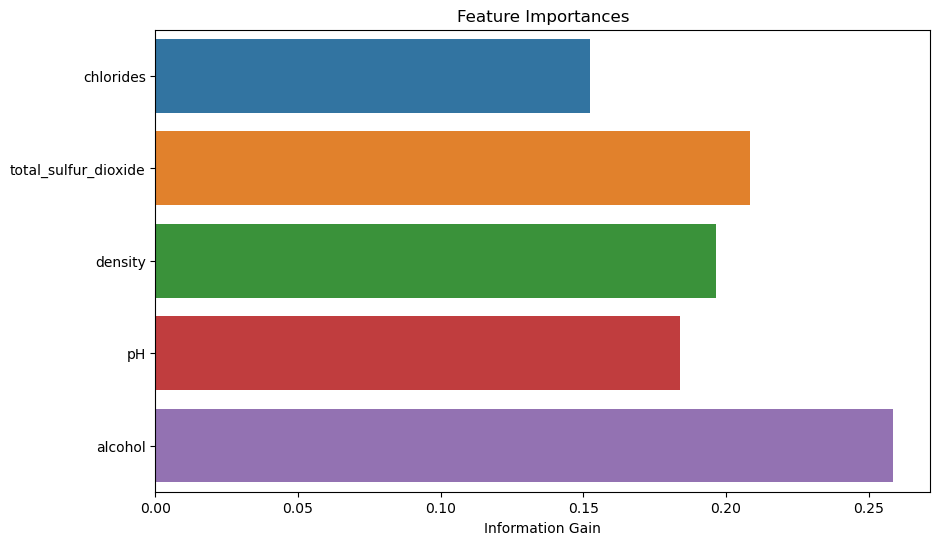

In [19]:
import seaborn as sns
plt.figure(figsize=(10, 6))
information_gain = tree_clf_specified.feature_importances_
sns.barplot(x=information_gain, y=X_specified.columns)
plt.xlabel('Information Gain')
plt.title('Feature Importances')
plt.show()

# Conclusion

Alcohol percentage is contributing a lot in making good wine. I feel each and every feature is contributing in making good wine. Among the given 5 features, chloride's contribution is less towards making good wine.